# Unit 8 Lecture 3 - Artificial Intelligence: Supervised Learning 2

CAI 4823: Artificial Intelligence for Industrial Engineers<br>
University of Central Florida


## Notebook Learning Objectives
After studying this notebook students should be able to:
- Perform Model Tunning of hyperparameters
- Define, train and execute Support Vector Machines
- Define, train and execute Decision Trees, Random Forest
- Perform Model Selection based on model accuracy
- Understand the basic concepts of learning and learning curves
- Using external data "dataset_small.pkl"

# Model Tunning
<p style="font-size: 16px">As mentioned before, the value of $k$ is a hyperparameter that can be tuned. Because of this, it is important to select the best $k$, or the $k$ that resulted in the highest accuracy.</p>
- Try multiple values for k for the <code>neighbors.KNeighborsClassifier(n_neighbors=k)</code>
- For what k we obtain the best model accuracy?

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import neighbors
from sklearn import datasets
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt

In [9]:
# we will use a smaller dataset for example sake
ofname = open('../Data/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname, encoding='latin1') #encoding='latin1' added since pkl was created in Python v2.x

knn = neighbors.KNeighborsClassifier(n_neighbors=11)

#PRC = 0.13
acc_r=np.zeros((10,20)) #to store output, 10 random split trials, 20 values for k, from 1 to 20.
print (acc_r)
for i in np.arange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    for k in np.arange(20):
        knn = neighbors.KNeighborsClassifier(n_neighbors=k+1)
        knn.fit(X_train,y_train)
        y_pred= knn.predict(X_test)
        acc_r[i][k] = metrics.accuracy_score(y_pred, y_test)
print (acc_r)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.75362319 0.8442029  0.81763285 0.83091787 0.82246377 0.82729469
  0.82246377 0.8321256  0.83454106 0.83091787 0.83091787 0.83091787
  0.82971014 0.83333333 0.83333333 0.83091787 0.8321256  0.82971014
  0.82971014 0.82729469]
 [0.73188406 0.82004831 0.78623188 0.82125604 0.81280193 0.81400966
  0.80917874 0.81884058 0.81642512 0.82608696 0.82246377 0.82246377
  0.

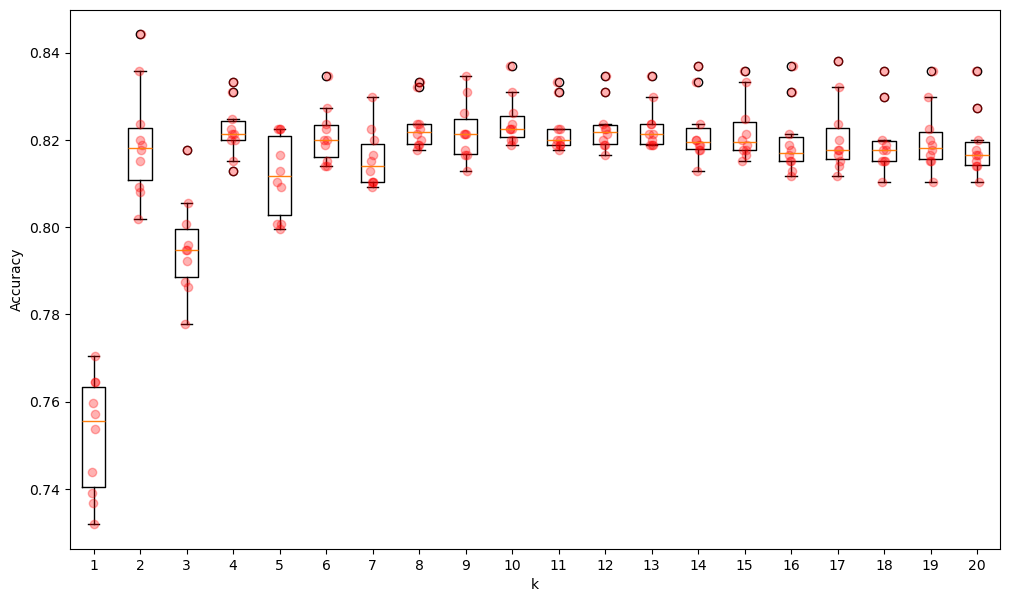

In [10]:
plt.figure(figsize=(12,7))
plt.boxplot(acc_r); # box plot

#start plotting red dots
for i in np.arange(20):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1 # just to help visualization, 
                        #add small random value in x-axis so that red dots are not all in one vertical line
    #print xderiv
    #print ">>>>>", i, acc_r[:,i]
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3) #ploting red dots
#end plotting red dots

ax = plt.gca()
ax.set_xticklabels(['{}'.format(k+1) for k in np.arange(20)])
plot_ = plt.ylabel('Accuracy')
plot_ = plt.xlabel('k')
plt.show()

<p style="font-size: 16px">As you can from the plot, varying the $k$ hyperparameter can change the results. This plot also demonstrates how randomized subsets of the data can change the final model parameters and overall success of the model as well. This is why it is important to undergo the process of model selection.</p>

# Support Vector Machines: <code>SVC()</code>
<p style="font-size: 16px">A support vector machine is a learning algorithm with the goal of learning a linear boundary between classes. The model learns the boundary via <i>support vectors</i> which are example points in the feature space, learning a boundary that creates the largest gap possible between the support vectors in each category. The distance of a point $\mathbf{x}\in\mathbf{R}^d$ to the hyperplane $\pi$ where $\pi$ is a combination of variables $\pi\equiv a^Tx+b=0$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\Vert a \Vert_2}$$

Our goal is to find the seperating hyperplane with the maximum margin with maximum distance between elements in different classes.

SVM therefore is:
$$\text{minimize } \quad \frac{\Vert a\Vert_2}{2}+C\sum_{i=1}^N\xi_i$$
$$\text{subject to } \quad y_i(a^Tx_ib)\geq 1-\xi_i, i=1 \cdots N $$
$$\xi\geq 0$$

<li style="font-size: 16px">$C$ is a trade-off parameter that balances the rates of margin and misclassification, with larger values giving more importance to error.</li>
<li style="font-size: 16px">$\xi$ loosley represents error, and we want it as close to 0 as possible. </li> 


<p style="font-size: 16px">We will use sklearn to train an svm model, for more information, visit <a href='http://scikit-learn.org/stable/modules/svm.html'>the svm documentation</a>.</p>

- <code>SVC(kernel='linear')</code>, could also have a kernel= ‘linear’, ‘poly’, ‘rbf’ , and ‘sigmoid’

### Creating some random points using <code>make_blobs()</code>

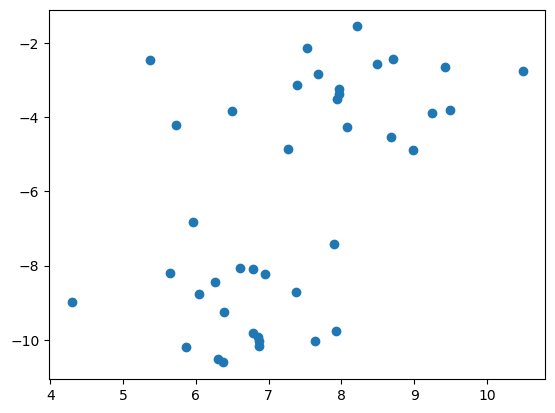

In [14]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# we create 40 separable points
X_blob, y_blob = make_blobs(n_samples=40, centers=2, random_state=6)
plt.scatter(X_blob[:, 0], X_blob[:, 1])

### Creating Training and Testing a SVM

(30, 30)
(900, 2)


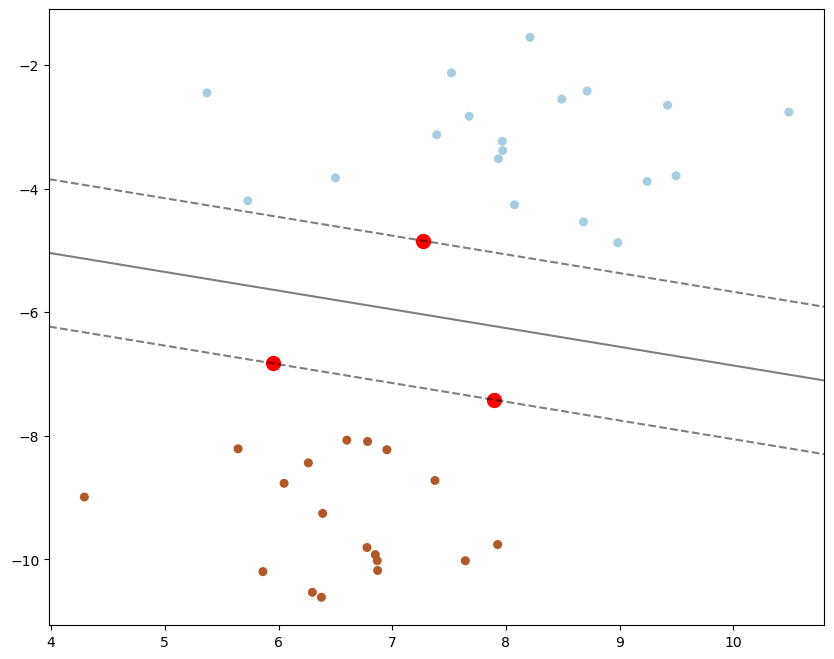

In [16]:
# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear')
#clf = SVC(kernel='poly')
#clf = SVC(kernel='rbf')
#clf = SVC(kernel='sigmoid')
clf.fit(X_blob, y_blob)

plt.figure(figsize=(10,8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca() #get current axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
print (XX.shape)
xy = np.vstack([XX.ravel(), YY.ravel()]).T #ravel(): Return a continuous flattened array.
                                        #vstack)(): Stack arrays in sequence vertically 
                                        #.T :self.transpose()
print (xy.shape)
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
plot_ = ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='red')

<p style="font-size: 16px">An <a href='http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html'>example</a> provided by sklearn is visualized above. The red points are the support vectors, the dashed lines represent the margin and the solid line is the linear decision boundary. Although this example shows a <i>linear </i> kernel, the model could use instead a <i>polynomial</i> kernel or <i>radial based function </i> kernel, or <i>sigmoid </i> kernel allowing for non-linear decision boundaries. </p> 

Note: for more information see Radial Basis Function (RBF) :
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html ) 

### SVM for the Lending Club Example

<p style="font-size: 16px">Now we will try our own SVM model with our previous small dataset.</p>

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import *
import pandas as pd

# Split the data into training and testin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=y.size)  
print('Training shape: {}, training targets shape: {}'.format(X_train.shape, y_train.shape))
print('Testing shape: {}, testing targets shape: {}'.format(X_test.shape, y_test.shape))

# Create SVC instance and call fit on our training dataset
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on our training and testing dataset to evaluate the results
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

results = dict()
train_cm = confusion_matrix(y_train, y_pred_train)
results['Training'] = {'classification_acc': accuracy_score(y_pred_train, y_train),
                      'TP': train_cm[0,0], 'FP': train_cm[0,1],
                      'FN': train_cm[1,0], 'TN': train_cm[1,1]}

test_cm = confusion_matrix(y_test, y_pred_test)
results['Test'] = {'classification_acc': accuracy_score(y_pred_test, y_test),
                      'TP': test_cm[0,0], 'FP': test_cm[0,1],
                      'FN': test_cm[1,0], 'TN': test_cm[1,1]}
pd.DataFrame(data=results)

Training shape: (2898, 15), training targets shape: (2898,)
Testing shape: (1242, 15), testing targets shape: (1242,)


,Training,Test
classification_acc,0.81401,0.824477
TP,2354.00000,1023.000000
FP,0.00000,0.000000
FN,539.00000,218.000000
TN,5.00000,1.000000


<p style="font-size: 16px">Unfortunately, because our feature vector is 15 variables long, plotting the decision boundary would be computationally complex and is beyond the scope of this course. What we do observe is that the training accuracy is higher than the testing accuracy, as expected. We also observe that the accuracy is higher than the previous learning method (k-nearest neighbors)</p>

## Random Forest: multitude of <code>tree.DecisionTreeClassifier()</code>
<p style="font-size: 16px">The random forest algorithm is a type of ensemble method. Ensemble methods combine classifiers built with a given learning algorithm, such as majority voting, the more diverse the classifiers the better the performance (see <a href='http://scikit-learn.org/stable/modules/ensemble.html'>sklearn ensemble</a>). The output of the ensemble is the "mean" output of the member classifiers. 

Random Forest operates by constructing a multitude of Decision Trees. The basic idea of a Decision Trees is to determine how do we <i>partition</i> or <i>split</i> the space and what feature should we use for each split.

- Decision Tree: <code>tree.DecisionTreeClassifier()</code>

# Model Selection: KNN, SVM, or Desicion Trees? 

In [23]:
# Loading the samall dataset for Lending Club
ofname = open('../Data/dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding='latin1') #encoding='latin1' added since pkl was created in Python v2.x

We can use the validation process for model selection.

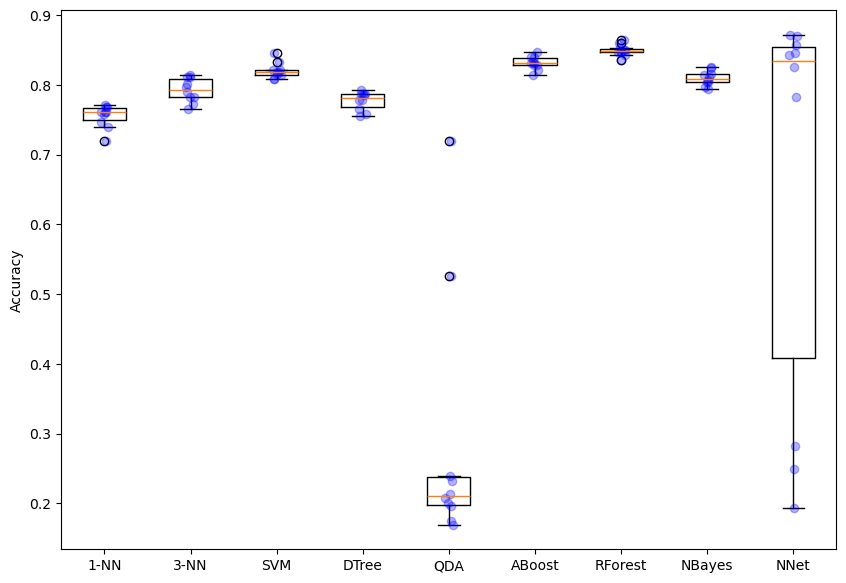

In [25]:
#The splitting can be done using the tools provided by sklearn:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn import discriminant_analysis
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import neural_network
import warnings


warnings.filterwarnings("ignore")
PRC = 0.1
acc_r=np.zeros((10,9)) # 10 trial (same experiment for statistics) x 5 classifiers
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()
    ABoost = ensemble.AdaBoostClassifier()
    RForest = ensemble.RandomForestClassifier()
    NBayes = naive_bayes.GaussianNB()
    NNet = neural_network.MLPClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    QDA.fit(X_train,y_train)
    ABoost.fit(X_train,y_train)
    RForest.fit(X_train,y_train)
    NBayes.fit(X_train,y_train)
    NNet.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    yhat_qda=QDA.predict(X_test)
    yhat_ABoost=ABoost.predict(X_test)
    yhat_RForest=RForest.predict(X_test)
    yhat_NBayes=NBayes.predict(X_test)
    yhat_NNet=NNet.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)
    acc_r[i][4] = metrics.accuracy_score(yhat_qda, y_test)
    acc_r[i][5] = metrics.accuracy_score(yhat_ABoost, y_test)
    acc_r[i][6] = metrics.accuracy_score(yhat_RForest, y_test)
    acc_r[i][7] = metrics.accuracy_score(yhat_NBayes, y_test)
    acc_r[i][8] = metrics.accuracy_score(yhat_NNet, y_test)


plt.boxplot(acc_r);
for i in range(9):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'bo',alpha=0.3)

ax = plt.gca()
ax.figure.set_figheight(7)  # inches
ax.figure.set_figwidth(10)  # inches
ax.set_xticklabels(['1-NN','3-NN','SVM','DTree','QDA','ABoost','RForest','NBayes','NNet'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300,bbox_inches='tight')

# What is Learning?

- Learning is minimizing the test error or __"generalization error"__
- __"training error:"__ error observed over all data samples in the _training set_
- __"test error:"__ error expected on unseen data



In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN=700

fig = plt.figure()
fig.set_size_inches(6,5)

plt.plot(1.25*np.random.randn(MAXN,1),1.25*np.random.randn(MAXN,1),'g.',alpha = 0.3) #random.randn(d0, d1..) ds are dimentions of returned array
#fig.hold('on')
plt.plot(8+1.5*np.random.randn(MAXN,1),5+1.5*np.random.randn(MAXN,1),'r.', alpha = 0.3)
plt.plot(5+1.5*np.random.randn(MAXN,1),5+1.5*np.random.randn(MAXN,1),'b.',alpha = 0.3)
plt.savefig("toy_problem.png",dpi=300, bbox_inches='tight')


# Learning Curves

- Lets see what is the effect of the number of training samples (training data) on the test error and training error of our algorithms
- The plot of number of samples vs. error is called: Learning Curve
- As number of training samples increases both errors tend to the same value
- When we have few training samples, the training error is low but the testing error is high

### Plot number of samples vs. errors (keep complexity high)
- Below we use complexity constant (C=5) for the decision tree

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree

C=5
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))
#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr)
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test)
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr)
        j=j+1

p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'g')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'r')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2],["Test C = 5","Train C = 5"])
plt.savefig("learning_curve_1.png",dpi=300, bbox_inches='tight')

### Plot number of samples vs. errors (keep complexity low)
- Let us repeat the process with a simpler model: C=1

In [31]:
C=1
MAXN=1000

#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr)
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test)
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr)
        j=j+1

p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p3,p4],["Test C = 1","Train C = 1"])
plt.savefig("learning_curve_2.png",dpi=300, bbox_inches='tight')

### Plot number of samples vs. errors (compare low and high complexity)
- join both to see the differences.

In [33]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='r')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'g')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2,p3,p4],["Test C = 5","Train C = 5","Test C = 1","Train C = 1"])
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.savefig("learning_curve_3.png",dpi=300, bbox_inches='tight')

- With  a low degree of complexity, the error of convergence is larger than the increased complexity case.
- With a low degree of complexity, the training and test errors converge to the bias sooner/with  fewer data.

### Plot number of complexity vs. errors (keep samples constant, tune C)
- Let us check now what happens when we fix the amount of data and change the complexity of the technique.
- Tuning C as a hyperparameter

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))
#Repeat ITERS times to get smooth curves
for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])

    j=0
    for C in range(1,MAXC+1):
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y)
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test)
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y)
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend([p1, p2], ["Testing error", "Training error"])
plt.savefig("learning_curve_4.png",dpi=300, bbox_inches='tight')

# Overfitting and Underfitting
Testing error increases with higher complexity: __Overfitting__

Testing error increases with lower complexity: __Underfitting__

__Overfitting:__ The model does not generalize well to the test data. (High varience, low bias)

__Underfitting__ Too simple with too few features. Does not generalize well (Low varience, high bias)

We seek to achieve a balance between high varience and high bias.

## How to address overfitting

- Cross-Validation
- Train with more data
- Regularization
- Ensembling

### Cross-Validation

Split your initial training data into multiple mini train-test sets. Use them to tune your model.

k-fold cross-validation: 

        1) Partition the data into k subsets (folds). 
        
        2) Train the model on k-1 folds iteratively 
        
        3) Use the remaining fold as the test set (“holdout fold”)

### Train with more data

Could help to eliminate the noise


### Regularization

Constrain complexity from becoming too high. Change the objective function penalize high complexity.

### Ensembling

Combining multiple separate models while training.

#### Bagging 

Train a large number of complex models in parallel.

Combine them and "smooth out" their predictions.

#### Boosting 

Improves the predictive flexibility of simple models.

Train a large number simple models to learn from the mistakes of the one before it.
Combines them into a single strong learner.

We may use all these concepts to understand and select the complexity of a model.

## Parameter selection via ```KFolds```

Here lets explore using KFolds: ```KFold(n_splits=10)```. We use 10 partitions of data, for each trial we leave one partition out as testing set and use the other 9 partitions to train the algorithm. This will give us 10 trials for each experiment. On each experiment we change the complexity parameter C from 2 to 20 on the Decision Tree algorithm to try to find experimentally the best C to use.
```tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)```

In [40]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="kfold-fig.jpg", width=600, height=600)

In [41]:
#%reset -f
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pickle

# Loading the samall dataset for Lending Club
ofname = open('../Data/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname, encoding='latin1') #encoding='latin1' added since pkl was created in Python v2.x

#Create a 10-fold cross validation set
kf=KFold(n_splits=10, shuffle=True, random_state=0)
      
#Search the parameter among the following, c = complexity = max_depth of decision tree
C=np.arange(2,20,)

acc = np.zeros((10,18)) #10 runs due to kfold, 18 values of C = [2,20]
i=0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'bo',alpha=0.3)

print ('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print ('Maximum accuracy: ' + str(np.max(acc,axis = 0)))
print ('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print ('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
print ('Mean Accuracy for C =', str(C[np.argmax(np.mean(acc,axis = 0))]), ' : ' + str( np.mean(acc,axis = 0)[np.argmax(np.mean(acc,axis = 0))]   ))
plt.ylim((0.75,0.90))
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
#plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')

Mean accuracy: [0.82536232 0.8263285  0.83188406 0.83429952 0.83550725 0.83333333
 0.82850242 0.82439614 0.8236715  0.81980676 0.81207729 0.80990338
 0.80338164 0.80241546 0.79710145 0.79202899 0.78164251 0.77922705]
Maximum accuracy: [0.85990338 0.85990338 0.8647343  0.86714976 0.86231884 0.85990338
 0.852657   0.84299517 0.84541063 0.85024155 0.83816425 0.83091787
 0.82125604 0.8236715  0.82850242 0.8236715  0.81642512 0.80676329]
Selected model index: 4
Complexity: 6
Mean Accuracy for C = 6  : 0.8355072463768115


Text(114.22222222222221, 0.5, 'Accuracy')

## ```GridSearchCV()``` Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict. GridSearchCV implements a “fit” and a “score” method. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In this example we use ```svm.SVC()```, C-Support Vector Classification, and search for best parameters over parameters  = {'C':[1e4,1e5,1e6],'gamma':[1e-5,1e-4,1e-3]}. ```GridSearchCV(cv=5)``` implement KFolds crossvalidation for 5 folds.

In [43]:
%reset -f
#NEW 

import pickle
ofname = open('../Data/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname, encoding='latin1') #encoding='latin1' added since pkl was created in Python v2.x

import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import svm

#Parameters for svm.SVC()
parameters  = {'C':[1e4,1e5,1e6],'gamma':[1e-5,1e-4,1e-3]} 
#parameters = {'C':[1e4],'gamma':[1e-5]}

svc = svm.SVC(kernel='rbf') 

#Exhaustive search over specified parameter values for an estimator.
clf = GridSearchCV(svc, parameters, cv = 5) #This line does a cross-validation cv=5, KFolds with 5 folds
clf.fit(X,y)

print(sorted(clf.cv_results_.keys()))
print("\nbest score= ", clf.best_score_, "\nbest params= ", clf.best_params_,"\nbest estimator= ",clf.best_estimator_,"\nsplits= ",clf.n_splits_)

results = pd.DataFrame.from_dict(clf.cv_results_)
results2 = results[['params','mean_test_score']]
ax = results2.plot(x='params', y='mean_test_score', kind='barh', xlim=[0.6,1.0])
results2


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_gamma', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']

best score=  0.8038647342995169 
best params=  {'C': 10000.0, 'gamma': 0.001} 
best estimator=  SVC(C=10000.0, gamma=0.001) 
splits=  5


,params,mean_test_score
0,"{'C': 10000.0, 'gamma': 1e-05}",0.772705
1,"{'C': 10000.0, 'gamma': 0.0001}",0.790338
2,"{'C': 10000.0, 'gamma': 0.001}",0.803865
3,"{'C': 100000.0, 'gamma': 1e-05}",0.772947
4,"{'C': 100000.0, 'gamma': 0.0001}",0.790338
5,"{'C': 100000.0, 'gamma': 0.001}",0.803865
6,"{'C': 1000000.0, 'gamma': 1e-05}",0.772947
7,"{'C': 1000000.0, 'gamma': 0.0001}",0.790338
8,"{'C': 1000000.0, 'gamma': 0.001}",0.803865


# References

1. Deep Learning, https://arxiv.org/pdf/1404.7828.pdf
2. Pytorch, Deep Learning Python Library, https://pytorch.org
3. Scikit-Learn, Python Library for Machine Learning, http://scikit-learn.org/stable/index.html
4. Next Generation AI: Common Sense, https://www.youtube.com/watch?time_continue=2564&v=7ROelYvo8f0

_Last updated on 9.5.25 23:18pm<br>
(C) 2025 Complex Adaptive Systems Laboratory, all rights reserved._